In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [613]:
customer = pd.read_csv(r"C:\Users\Dell\Documents\Python Programing Alab\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [614]:
spend = pd.read_csv(r'C:\Users\Dell\Documents\Python Programing Alab\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')
    
spend 

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [615]:
# droping unwanted column "SL No.)"
spend.drop(['Sl No:'],axis=1,inplace =True)


In [616]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [617]:
# cheking datatypes

spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [618]:
# converting into right datatype to 'Month' column

spend['Month'] = pd.to_datetime(spend['Month'])
spend['Month'].head()

0   2004-01-12
1   2004-01-03
2   2004-01-15
3   2004-01-25
4   2005-01-17
Name: Month, dtype: datetime64[ns]

In [619]:
spend.dtypes

Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [620]:
repay_data = pd.read_csv(r'C:\Users\Dell\Documents\Python Programing Alab\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')

repay_data            

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [621]:
# droping unwanted column "SL No.)"

repay_data.drop(['SL No:'],axis=1,inplace =True)

In [622]:
repay_data.head(2)

,Customer,Month,Amount,Unnamed: 4
0,A1,12-Jan-04,495414.75,NaN
1,A1,3-Jan-04,245899.02,NaN


In [623]:
repay_data.drop(['Unnamed: 4'],axis=1,inplace=True)

In [624]:
repay_data.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [625]:
# cheking the dtypes
repay_data.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [626]:
#changing dtype for month
repay_data['Month'] = pd.to_datetime(repay_data['Month'])

In [627]:
# re-checking the data types
repay_data.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

# (Q1)a. In case age is less than 18, replace it with mean of age values.

In [628]:
mean_age = customer['Age'].mean()

mean_age

46.49

In [629]:
new_mean_age = customer.loc[customer["Age"] < 18,"Age"] = mean_age

In [630]:
new_mean_age = customer["Age"].mean()

new_mean_age

48.399399999999986

# (Q1)b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [631]:
# merging the 'customer' and 'spend' dataset

customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [632]:
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [633]:
# customer's spend amount is more than the limit,replacing with 50% of that customer’s limit

customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)


In [634]:
#there are no customers left whose spend amount is more than the limit

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


# (Q1)c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [635]:
# merging the 'customer' and 'repay' dataset
customer_repay = pd.merge(left=repay_data,right=customer,on="Customer",how="inner")

customer_repay

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A7,2005-11-22,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,2005-12-03,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,2005-02-23,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,2006-03-31,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [636]:
#all the customers where repayment amount is more than the limit.

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
18,A8,2004-02-05,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,2004-01-12,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,2006-03-31,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,2005-05-09,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,2006-05-08,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...
1494,A7,2006-05-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,2005-12-03,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,2005-02-23,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,2006-03-31,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [637]:
#customers where repayment amount is more than the limit, replacing the repayment with the limit.

customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [638]:
#there are no customers left where repayment amount is more than the limit.

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment


# (Q.2)-A. How many distinct customers exist?


In [639]:
customer['Customer'].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29',
       'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38',
       'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47',
       'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56',
       'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65',
       'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74',
       'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83',
       'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92',
       'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100'],
      dtype=object)

# (Q2)b. How many distinct categories exist?

In [640]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

# (Q2)c. What is the average monthly spend by customers?


In [642]:
# creating new column "month" and "year"

spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['year'] = spend['Month'].dt.year

In [643]:
spend

,Customer,Month,Type,Amount,Monthly,year
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [644]:
#grouping the dataset based on 'Yearly' and 'monthly'

monthy_spend = round(spend.groupby(['year','Monthly']).mean(),2)

monthy_spend

Amount
year Monthly             
2004 April      235272.04
     February   221215.27
     January    251712.07
     March      232146.12
     May        217539.24
     November   270486.40
     September  310923.38
2005 April      252181.33
     August     233734.63
     December   147503.06
     February   229802.28
     January    292741.37
     July       229116.66
     June       262688.11
     May        245696.52
     November   286143.32
     October    194568.64
     September  188666.20
2006 April      232468.97
     August     240699.72
     December   270470.98
     February   253858.26
     January    282058.01
     July       287505.10
     June       177252.39
     March      247166.08
     May        236162.74
     November   182841.29
     October    236136.33
     September  158520.09

# (Q2)e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

In [645]:
# merging all dataset together

customer_spend_repay = pd.merge(left=customer_spend,right=repay_data,on="Customer",how="inner")
customer_spend_repay.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88


In [646]:
# renaming the necessary column.

customer_spend_repay.rename(columns={"Amount_x":"Monthly_Spend","Amount_y":"Monthly_Repayment"},inplace=True)
customer_spend_repay.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Monthly_Spend,Month_y,Monthly_Repayment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06


In [647]:
## creating new column "month" and "year"

customer_spend_repay['Monthly'] = customer_spend_repay['Month_x'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_spend_repay['Yearly'] = customer_spend_repay['Month_x'].dt.year

In [648]:
customer_spend_repay.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Monthly_Spend,Month_y,Monthly_Repayment,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,January,2004


In [649]:
# # grouping the data based on "Yearly","Monthly" columns to get the 'Spend_Amount'and 'Repay_Amount'

interest_group = customer_spend_repay[['Yearly','Monthly','Monthly_Spend','Monthly_Repayment']].groupby(['Yearly','Monthly']).sum()

interest_group

Monthly_Spend  Monthly_Repayment
Yearly Monthly                                    
2004   April       9.049341e+07       1.795128e+08
       February    9.842368e+07       1.736560e+08
       January     1.143343e+09       1.873917e+09
       March       5.277091e+07       9.071044e+07
       May         5.841022e+07       9.187162e+07
       November    3.125216e+07       8.943304e+07
       September   6.507525e+07       9.273326e+07
2005   April       1.198022e+08       1.944499e+08
       August      1.051836e+08       1.731517e+08
       December    3.170860e+07       8.954003e+07
       February    6.792701e+08       1.040628e+09
       January     1.511804e+08       1.796611e+08
       July        4.636628e+07       9.981389e+07
       June        2.325435e+08       3.144390e+08
       May         5.905389e+08       8.895885e+08
       November    1.914965e+08       2.582066e+08
       October     3.077381e+07       8.525009e+07
       September   3.844917e+07       7.888690e+07
2006   April       3.192713e+08       5.748955e+08
       August      8.355435e+07       1.017625e+08
       December    4.447626e+07       7.571813e+07
       February    1.480151e+08       2.372385e+08
       January     4.455873e+07       8.570876e+07
       July        1.518317e+08       1.858434e+08
       June        5.949566e+07       9.192668e+07
       March       7.082175e+08       1.282546e+09
       May         2.047262e+08       3.287737e+08
       November    9.331193e+07       1.590248e+08
       October     7.063433e+07       9.611769e+07
       September   6.281231e+07       9.996138e+07

In [650]:
# Monthly Profit = Monthly repayment – Monthly spend.

interest_group['Monthly_Profit'] = interest_group['Monthly_Repayment'] - interest_group['Monthly_Spend']
interest_group

Monthly_Spend  Monthly_Repayment  Monthly_Profit
Yearly Monthly                                                    
2004   April       9.049341e+07       1.795128e+08    8.901941e+07
       February    9.842368e+07       1.736560e+08    7.523227e+07
       January     1.143343e+09       1.873917e+09    7.305739e+08
       March       5.277091e+07       9.071044e+07    3.793952e+07
       May         5.841022e+07       9.187162e+07    3.346140e+07
       November    3.125216e+07       8.943304e+07    5.818089e+07
       September   6.507525e+07       9.273326e+07    2.765801e+07
2005   April       1.198022e+08       1.944499e+08    7.464764e+07
       August      1.051836e+08       1.731517e+08    6.796811e+07
       December    3.170860e+07       8.954003e+07    5.783143e+07
       February    6.792701e+08       1.040628e+09    3.613576e+08
       January     1.511804e+08       1.796611e+08    2.848071e+07
       July        4.636628e+07       9.981389e+07    5.344760e+07
       June        2.325435e+08       3.144390e+08    8.189546e+07
       May         5.905389e+08       8.895885e+08    2.990496e+08
       November    1.914965e+08       2.582066e+08    6.671003e+07
       October     3.077381e+07       8.525009e+07    5.447628e+07
       September   3.844917e+07       7.888690e+07    4.043773e+07
2006   April       3.192713e+08       5.748955e+08    2.556241e+08
       August      8.355435e+07       1.017625e+08    1.820818e+07
       December    4.447626e+07       7.571813e+07    3.124187e+07
       February    1.480151e+08       2.372385e+08    8.922340e+07
       January     4.455873e+07       8.570876e+07    4.115003e+07
       July        1.518317e+08       1.858434e+08    3.401169e+07
       June        5.949566e+07       9.192668e+07    3.243102e+07
       March       7.082175e+08       1.282546e+09    5.743285e+08
       May         2.047262e+08       3.287737e+08    1.240474e+08
       November    9.331193e+07       1.590248e+08    6.571288e+07
       October     7.063433e+07       9.611769e+07    2.548335e+07
       September   6.281231e+07       9.996138e+07    3.714907e+07

In [651]:
# monthly rate of interest is 2.9%.

interest_group['Monthly_Interest'] = (2.9* interest_group['Monthly_Profit'])/100

interest_group

Monthly_Spend  Monthly_Repayment  Monthly_Profit  \
Yearly Monthly                                                       
2004   April       9.049341e+07       1.795128e+08    8.901941e+07   
       February    9.842368e+07       1.736560e+08    7.523227e+07   
       January     1.143343e+09       1.873917e+09    7.305739e+08   
       March       5.277091e+07       9.071044e+07    3.793952e+07   
       May         5.841022e+07       9.187162e+07    3.346140e+07   
       November    3.125216e+07       8.943304e+07    5.818089e+07   
       September   6.507525e+07       9.273326e+07    2.765801e+07   
2005   April       1.198022e+08       1.944499e+08    7.464764e+07   
       August      1.051836e+08       1.731517e+08    6.796811e+07   
       December    3.170860e+07       8.954003e+07    5.783143e+07   
       February    6.792701e+08       1.040628e+09    3.613576e+08   
       January     1.511804e+08       1.796611e+08    2.848071e+07   
       July        4.636628e+07       9.981389e+07    5.344760e+07   
       June        2.325435e+08       3.144390e+08    8.189546e+07   
       May         5.905389e+08       8.895885e+08    2.990496e+08   
       November    1.914965e+08       2.582066e+08    6.671003e+07   
       October     3.077381e+07       8.525009e+07    5.447628e+07   
       September   3.844917e+07       7.888690e+07    4.043773e+07   
2006   April       3.192713e+08       5.748955e+08    2.556241e+08   
       August      8.355435e+07       1.017625e+08    1.820818e+07   
       December    4.447626e+07       7.571813e+07    3.124187e+07   
       February    1.480151e+08       2.372385e+08    8.922340e+07   
       January     4.455873e+07       8.570876e+07    4.115003e+07   
       July        1.518317e+08       1.858434e+08    3.401169e+07   
       June        5.949566e+07       9.192668e+07    3.243102e+07   
       March       7.082175e+08       1.282546e+09    5.743285e+08   
       May         2.047262e+08       3.287737e+08    1.240474e+08   
       November    9.331193e+07       1.590248e+08    6.571288e+07   
       October     7.063433e+07       9.611769e+07    2.548335e+07   
       September   6.281231e+07       9.996138e+07    3.714907e+07   

                  Monthly_Interest  
Yearly Monthly                      
2004   April          2.581563e+06  
       February       2.181736e+06  
       January        2.118664e+07  
       March          1.100246e+06  
       May            9.703805e+05  
       November       1.687246e+06  
       September      8.020823e+05  
2005   April          2.164782e+06  
       August         1.971075e+06  
       December       1.677112e+06  
       February       1.047937e+07  
       January        8.259406e+05  
       July           1.549980e+06  
       June           2.374968e+06  
       May            8.672437e+06  
       November       1.934591e+06  
       October        1.579812e+06  
       September      1.172694e+06  
2006   April          7.413100e+06  
       August         5.280371e+05  
       December       9.060144e+05  
       February       2.587479e+06  
       January        1.193351e+06  
       July           9.863391e+05  
       June           9.404996e+05  
       March          1.665553e+07  
       May            3.597376e+06  
       November       1.905674e+06  
       October        7.390172e+05  
       September      1.077323e+06

# (Q2) f. What are the top 5 product types?

In [652]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

# (Q2)g. Which city is having maximum spend?

In [653]:
customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False).reset_index()

,City,Amount
0,COCHIN,45963513.50
1,CALCUTTA,41108132.30
2,BANGALORE,40461647.02
3,BOMBAY,28603127.38
4,CHENNAI,22128635.65
5,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
7,DELHI,10918286.54


# (Q2)h. Which age group is spending more money?


In [654]:
#creating new column "Age Group" with 8 bins between 18 to 88 

customer_spend["Age_Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42


In [655]:
customer_spend.groupby("Age_Group")["Amount"].sum().sort_values(ascending=False).head(5).reset_index()

,Age_Group,Amount
0,42-50,53242390.70
1,34-42,38037826.50
2,26-34,30553459.81
3,18-26,25233896.65
4,50-58,22454066.68


# (Q2)i. Who are the top 10 customers in terms of repayment?

In [656]:
customer_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


# (Q3). Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.



In [657]:
# creating new column "yearly"
customer_spend['yearly'] = customer_spend['Month'].dt.year

customer_spend.head(4)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004


In [686]:
# grouping the data .
city_spend = customer_spend[['City','Product','Amount','yearly']].groupby(['City','yearly','Product']).sum()

city_spend

Amount
City       yearly Product              
BANGALORE  2004   Gold       9289878.54
                  Platimum   1112732.30
                  Silver     1291852.58
           2005   Gold      12892362.99
                  Platimum    912284.97
...                                 ...
TRIVANDRUM 2005   Platimum   3601443.30
                  Silver      269912.99
           2006   Gold       2735710.87
                  Platimum   2147403.75
                  Silver      555862.12

[72 rows x 1 columns]

Text(0.5, 1.0, 'Amount spended by customers according to year and city')

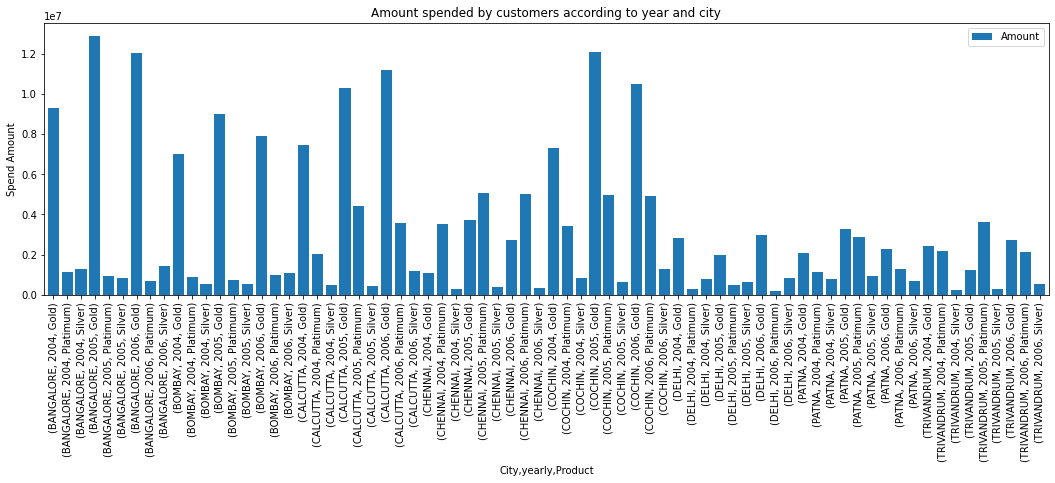

In [659]:
city_spend.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")

# (Q4)a. Monthly comparison of total spends, city wise


In [684]:
# creating new column "monthly"
customer_spend['monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_spend.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January


In [685]:
# grouping the data based on "monthly","City" to get spends amount.

city_total_spend = customer_spend.groupby(["monthly","City"])[["Amount"]].sum()
city_total_spend

Amount
monthly   City                  
April     BANGALORE   4207980.48
          BOMBAY      1873785.01
          CALCUTTA    3457507.95
          CHENNAI     2518656.99
          COCHIN      3882744.94
...                          ...
September CHENNAI      745759.40
          COCHIN      1382242.90
          DELHI         50001.00
          PATNA         70329.95
          TRIVANDRUM   186063.70

[96 rows x 1 columns]

In [662]:
city_total_spend =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='monthly',aggfunc='sum')
city_total_spend

monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


Text(0.5, 1.0, 'Monthly comparison of total spends')

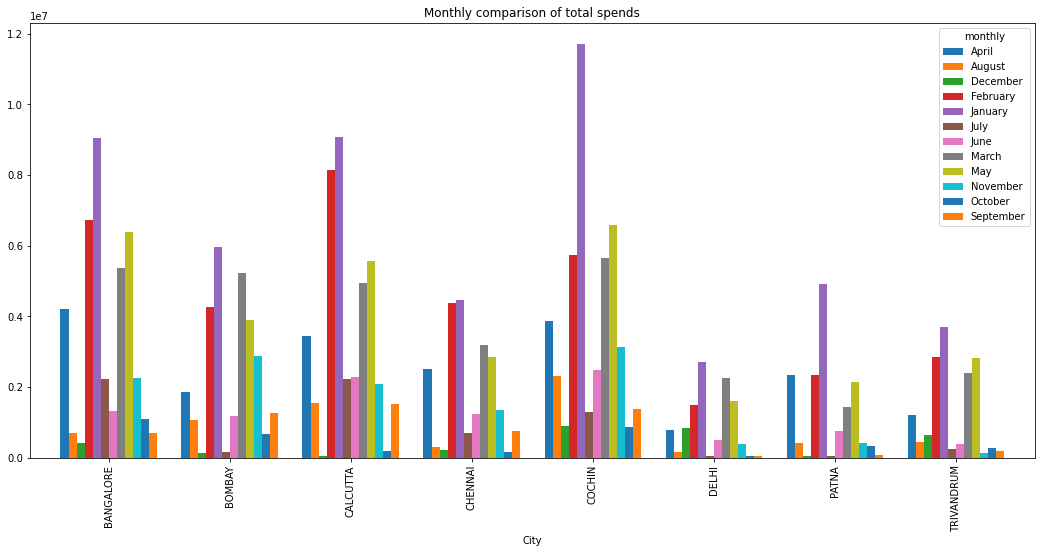

In [663]:
city_total_spend.plot(kind="bar",figsize=(18,8),width=0.8)
plt.title("Monthly comparison of total spends")


# b. Comparison of yearly spend on air tickets

In [664]:
air_tickets = customer_spend.groupby(["yearly","Type"])[["Amount"]].sum().reset_index()

air_tickets

,yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [665]:
yearly_air_ticKet = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

yearly_air_ticKet

,yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


Text(0.5, 1.0, 'Comparison of yearly spend on air tickets')

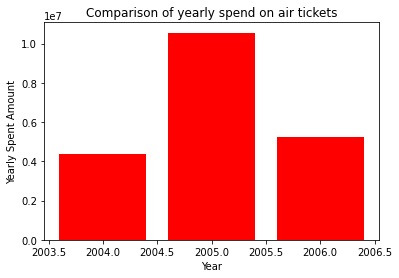

In [666]:
plt.bar(yearly_air_ticKet['yearly'],height=yearly_air_ticKet['Amount'],color='Red')
plt.xlabel("Year")
plt.ylabel("Yearly Spent Amount")
plt.title("Comparison of yearly spend on air tickets")

# c. Comparison of monthly spend for each product 

In [667]:
monthly_spend_product= customer_spend.groupby(["monthly","Product"])[["Amount"]].sum()

monthly_spend_product

Amount
monthly   Product              
April     Gold      13170572.59
          Platimum   5182493.86
          Silver     1902322.65
August    Gold       4954030.42
          Platimum   1714762.80
          Silver      293109.82
December  Gold       2332940.96
          Platimum    750156.19
          Silver      200537.90
February  Gold      24779179.55
          Platimum   9134054.58
          Silver     2087018.37
January   Gold      32413831.83
          Platimum  14951578.51
          Silver     4206383.62
July      Gold       5167416.37
          Platimum   1288156.26
          Silver      530153.72
June      Gold       6538862.64
          Platimum   2965712.71
          Silver      689537.61
March     Gold      19256972.48
          Platimum   7288837.68
          Silver     3909405.83
May       Gold      21548169.76
          Platimum   8151926.49
          Silver     2140940.01
November  Gold       9203267.46
          Platimum   2741618.42
          Silver      691102.63
October   Gold       3018223.38
          Platimum    550275.04
          Silver      100001.50
September Gold       3816887.62
          Platimum   1667840.84
          Silver      442803.13

Text(0.5, 1.0, 'Amount spent monthly for each products')

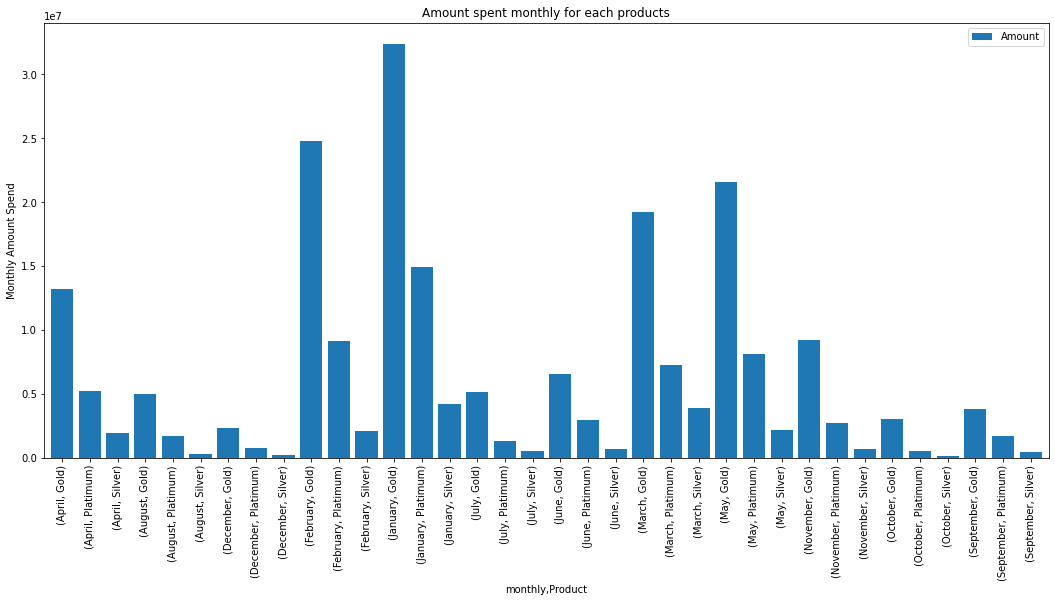

In [668]:
monthly_spend_product.plot(kind='bar',figsize=(18,8),width=0.8)
plt.ylabel("Monthly Amount Spend")
plt.title("Amount spent monthly for each products")

According to graph these are the months when salaes are high in below Months:

.January
.February
.March
.May
.April

# (Q.5)-You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month.


In [669]:
# creating new column "monthy" and 'yearly'
customer_repay['monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['yearly'] = customer_repay['Month'].dt.year

customer_repay

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,monthly,yearly
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
4,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A7,2005-11-22,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,November,2005
1496,A7,2005-12-03,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,December,2005
1497,A7,2005-02-23,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,February,2005
1498,A7,2006-03-31,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,March,2006


In [680]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result


In [683]:
summary_report('Silver','yearly')

Give the product name and timeperiod for which you want the data


yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51